<a href="https://colab.research.google.com/github/caiobellezi/estudos/blob/master/Seaborn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#aplicar estilo dos graficos
sns.set(style="darkgrid")

In [ ]:
#carregar dataset dentro da biblioteca do seaborn

tips = sns.load_dataset("tips")
tips.head() 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


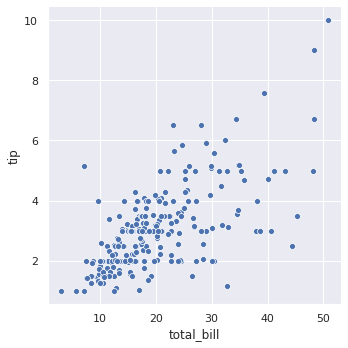

In [ ]:
#relating variables plot
sns.relplot(x="total_bill",y="tip",  data=tips);

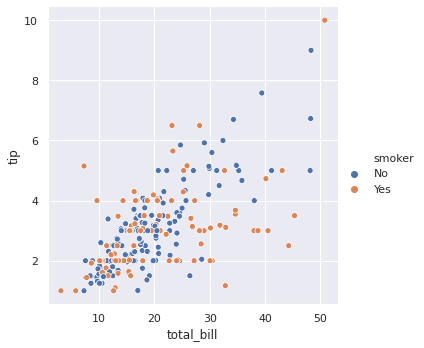

In [ ]:
#diferenciando fumantes e nao fumantes por cor
sns.relplot(x="total_bill",y="tip", hue='smoker',  data=tips);

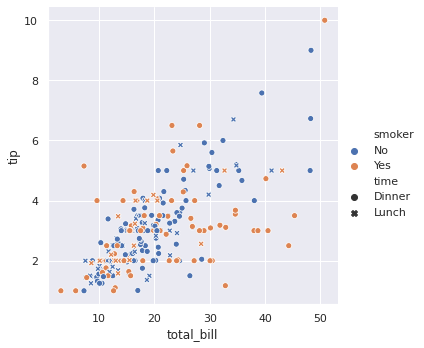

In [ ]:
#diferenciando fumantes e nao fumantes por cor 
#e horario por estilo de marcador
sns.relplot(x="total_bill",y="tip", hue='smoker',  style="time", data=tips);

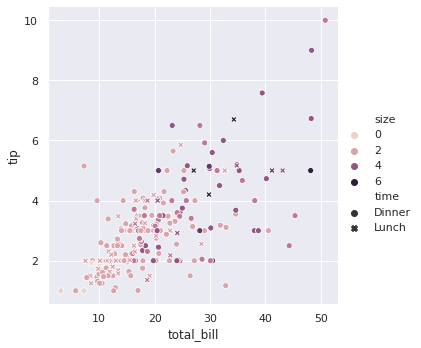

In [ ]:
#cores por tamanho da gorjeta
sns.relplot(x="total_bill", y="tip", hue="size", style="time", data=tips);

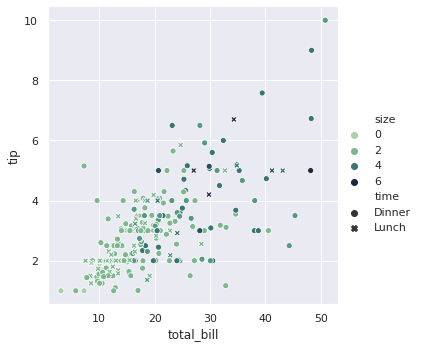

In [ ]:
#alterando a paleta de cor
sns.relplot(x="total_bill", y="tip", hue="size", style="time", palette="ch:r=-.5,l=.75", data=tips);

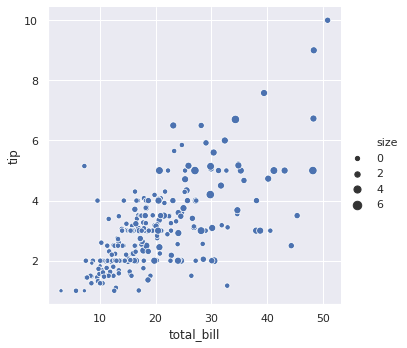

In [ ]:
#alterando o tamanho dos pontos de acordo com o tamanho da gorjeta
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

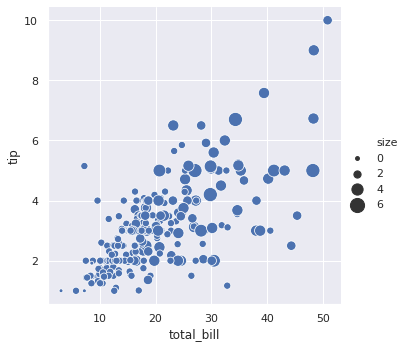

In [ ]:
#limitar os tamanhos dos pontos
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

# Continuidade de linhas

In [ ]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))

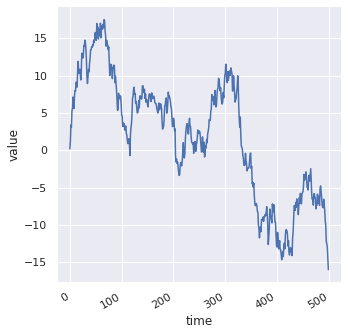

In [ ]:

g= sns.relplot(x="time", y='value', data=df, kind='line')
g.fig.autofmt_xdate()

In [ ]:
#por padrão o eixo X é organizado, mas isso poder ser alterado com a função sort
df = pd.DataFrame(np.random.randn(500,2).cumsum(axis=0), columns=["x", "y"])


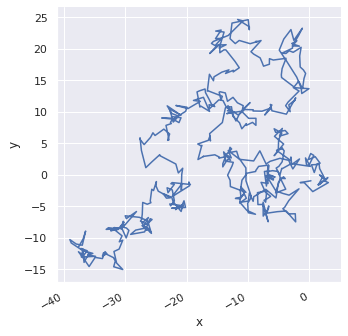

In [ ]:
g= sns.relplot(x="x", y='y', data=df, kind='line', sort=False)
g.fig.autofmt_xdate()

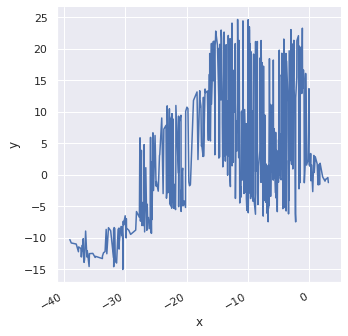

In [ ]:
g= sns.relplot(x="x", y='y', data=df, kind='line', sort=True)
g.fig.autofmt_xdate()

# Aggregation and representing uncertainty

In [ ]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


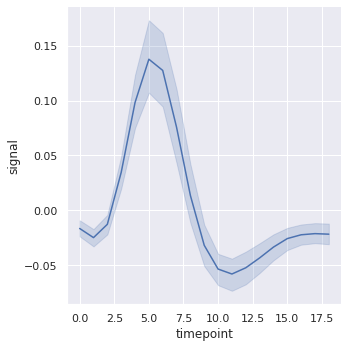

In [ ]:
#plotando com intervalo de confiança
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

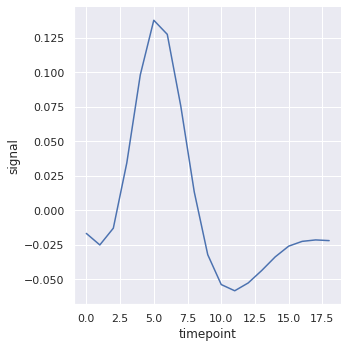

In [ ]:
#plotando sem o intervalo de confiança
sns.relplot(x='timepoint', y='signal', kind='line', data=fmri, ci=None );

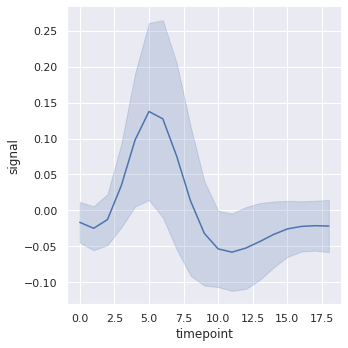

In [ ]:
#plotando com o desvio padrão, util para grandes datasets
sns.relplot(x='timepoint', y='signal', kind='line', data=fmri, ci='sd');

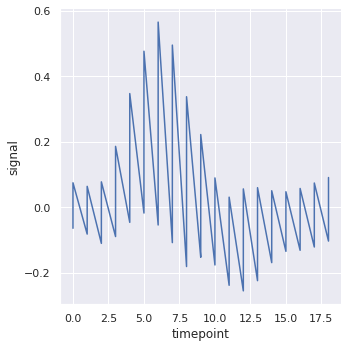

In [ ]:
#é possivel desativar o agregador completamente usando estimator = none
sns.relplot(x='timepoint', y='signal', kind='line', data=fmri, estimator=None)

# Plotando subsets de dados com mapeamento semantico


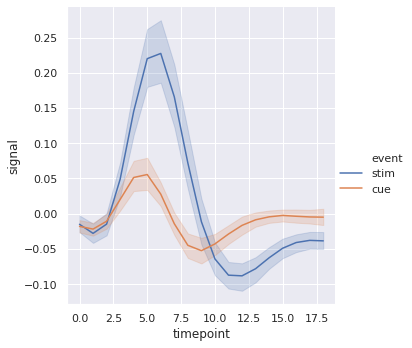

In [ ]:
sns.relplot(x='timepoint', y='signal', data=fmri, hue='event', kind='line');

Adding a style semantic to a line plot changes the pattern of dashes in the line by default:

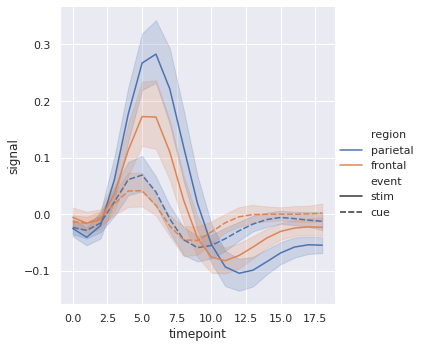

In [ ]:
sns.relplot(x='timepoint', y='signal', data=fmri, style='event', hue='region', kind='line');

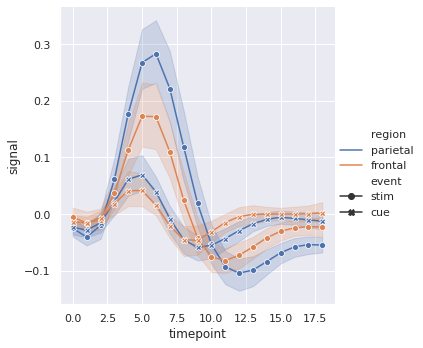

In [ ]:
#adicionar marcadores para cada observação
sns.relplot(x='timepoint', y='signal', hue='region', style='event', 
            dashes=False, markers=True, kind='line', data=fmri);

 muita informação acaba complicando e ficando dificil de entender e analisar
 

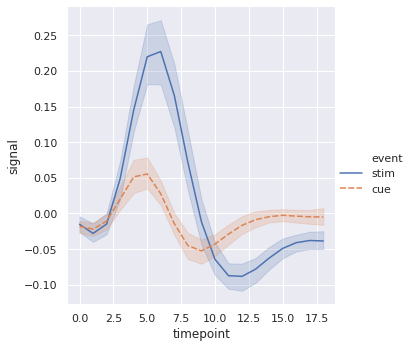

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            kind="line", data=fmri);

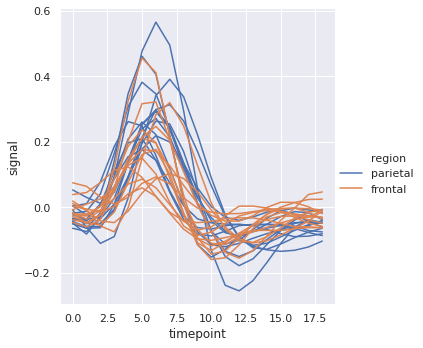

In [ ]:
#usar somente dados onde evento == stim
#sem estimadores
#no entando uma linha para cada subject
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"));

por padrão o colormap e a legenda depende se a variavel é categorica ou numérica

In [ ]:
dots = sns.load_dataset('dots').query("align == 'dots'")

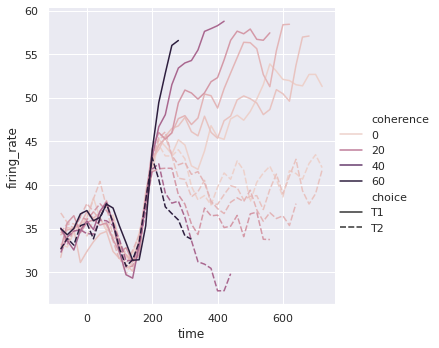

In [ ]:
sns.relplot(x='time', y='firing_rate', hue='coherence', kind='line', style='choice', data=dots);

neste caso a variavel `coherence` é em escala logaritimica, portanto a visualização não fica adequada, você pode passar um dicionário de cores para cada linha

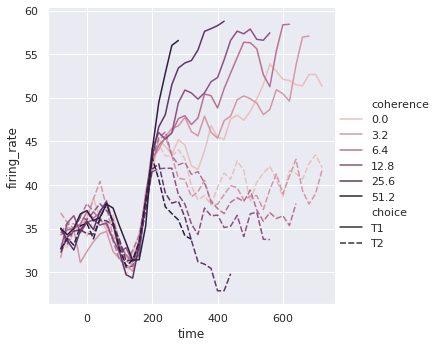

In [ ]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x='time', y='firing_rate', hue='coherence', 
            kind='line', style='choice', 
            palette=palette, data=dots);

ou alterar como o colormap é normalizado

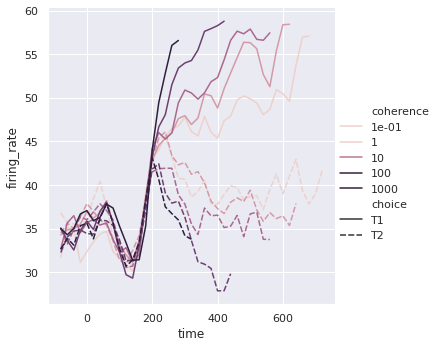

In [ ]:
from matplotlib.colors import LogNorm, PowerNorm

sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            hue_norm=LogNorm(),
            kind="line", data=dots);

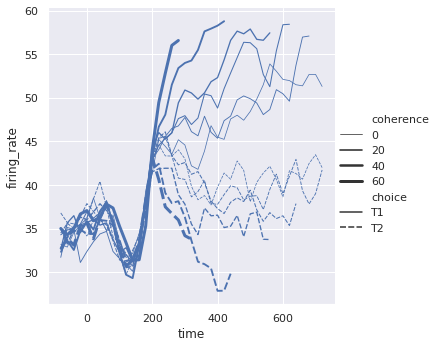

In [ ]:
#pode se tambem alterar as espessuras das linhas
sns.relplot(x="time", y="firing_rate",
            size="coherence", style="choice",
            kind="line", data=dots);

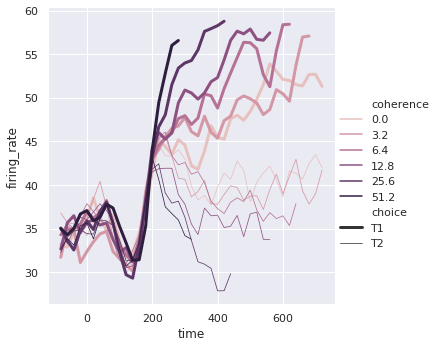

In [ ]:
sns.relplot(x="time", y="firing_rate",
           hue="coherence", size="choice",
           palette=palette,
           kind="line", data=dots);

Plotando com datas

In [ ]:
df= pd.DataFrame(dict(time=pd.date_range("2017-01-01", periods=500),
                      value=np.random.randn(500).cumsum()))

In [ ]:
df.head()

,time,value
0,2017-01-01,0.981877
1,2017-01-02,0.662174
2,2017-01-03,1.724759
3,2017-01-04,0.234567
4,2017-01-05,-1.548929


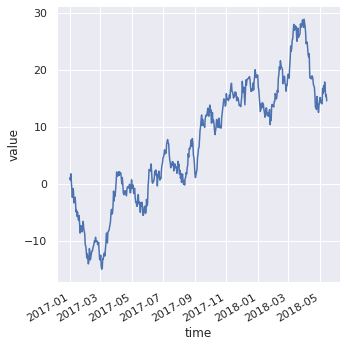

In [ ]:
g = sns.relplot(x='time', y='value', kind='line', data=df)
g.fig.autofmt_xdate()


# subplots

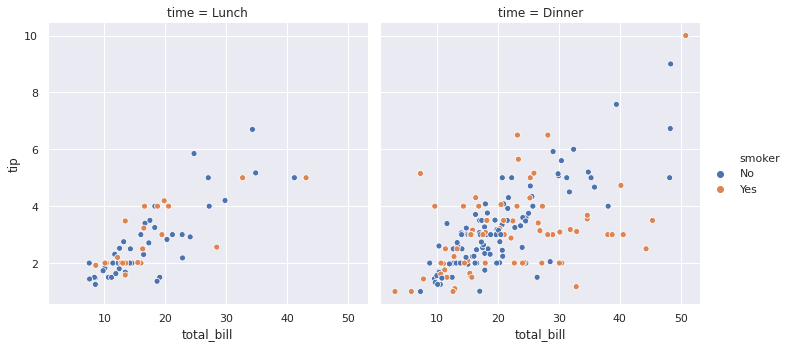

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

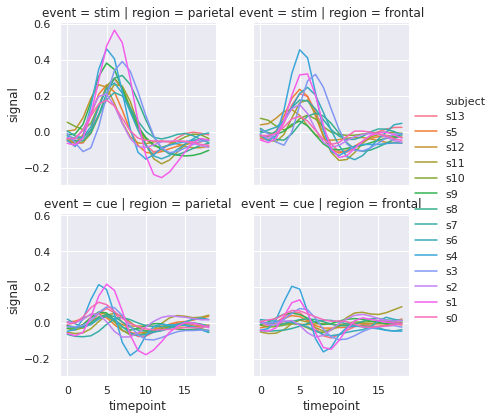

In [ ]:
#separar em grid "col" e "grid"

sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

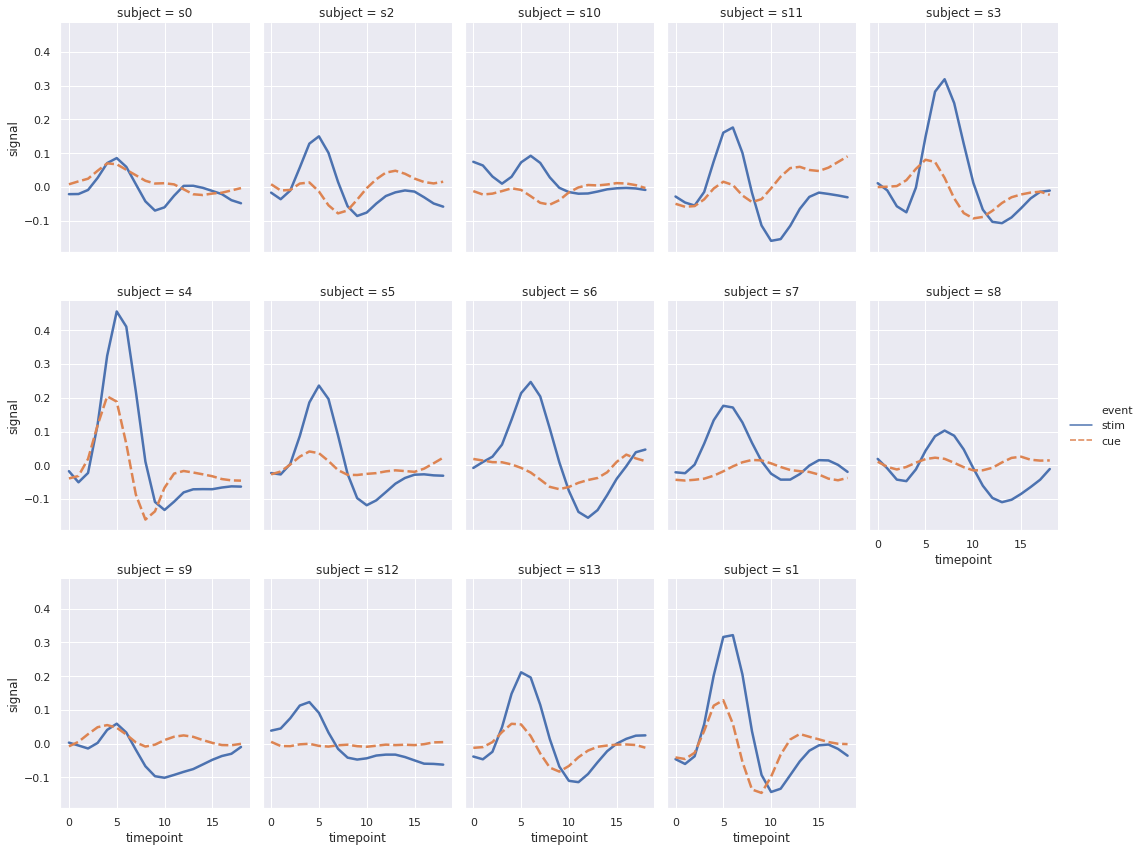

In [ ]:
# col_wrap=5 plota 5 colunas e quebra a linha, as linhas são consequencias
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=4, aspect=0.75, linewidth=2.5, #height define a altura, apect a proporção da largura em relação a altura, linewidth a espessura da linha
            kind="line", data=fmri.query("region == 'frontal'"));